# Taller de Inteligencia Artificial: Reconocimiento de Dígitos

## Introducción al Proyecto

En este taller aprenderemos a crear una **red neuronal** que puede reconocer números escritos a mano. Es como enseñarle a una computadora a "ver" y entender números del 0 al 9.

## Dataset MNIST

Usaremos el dataset **MNIST**, que contiene 70,000 imágenes de dígitos escritos a mano:
- 60,000 imágenes para entrenar
- 10,000 imágenes para probar
- Cada imagen es de 28x28 píxeles en escala de grises

## Objetivo del Taller

Crear una red neuronal simple que clasifique correctamente más del **95%** de los dígitos del conjunto de prueba.

## Paso 1: Configuración del Entorno de Desarrollo

**Tarea**: Configurar el entorno de Python con las bibliotecas necesarias para construir y entrenar una red neuronal que reconozca dígitos escritos a mano.

**Enfoque**: Para construir una red neuronal de reconocimiento de dígitos, necesitamos tres herramientas clave:

- **TensorFlow/Keras**: TensorFlow es un potente framework de aprendizaje automático desarrollado por Google. Keras es una API de alto nivel integrada en TensorFlow que facilita la construcción y entrenamiento de redes neuronales. Utilizaremos Keras para definir la arquitectura de nuestra red, compilar el modelo y entrenarlo.

- **NumPy**: Una biblioteca fundamental para computación numérica en Python. Las redes neuronales trabajan con arreglos multidimensionales (tensores), y NumPy proporciona herramientas eficientes para manipular estos arreglos. Lo usaremos para el preprocesamiento y análisis de datos.

- **Matplotlib**: Una biblioteca de visualización para crear gráficos. La usaremos para mostrar imágenes de dígitos escritos a mano y visualizar el progreso del entrenamiento y las predicciones de nuestro modelo.

Al importar estas bibliotecas al inicio, aseguramos que todas las herramientas que necesitamos estén disponibles a lo largo de nuestro proyecto.

**Código**:

In [1]:
# Importamos las librerías necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow versión:", tf.__version__)
print("Librerías importadas correctamente!")

TensorFlow versión: 2.20.0
Librerías importadas correctamente!


**Resultado**: Las bibliotecas se han importado exitosamente. La salida muestra la versión de TensorFlow instalada (2.20.0) y confirma que todas las herramientas necesarias están disponibles. Esto significa que nuestro entorno está configurado correctamente y estamos listos para trabajar con redes neuronales. Ahora podemos proceder a cargar el dataset MNIST y comenzar a construir nuestro modelo.

## Paso 2: Cargar el Dataset MNIST

**Tarea**: Descargar y cargar el dataset MNIST que contiene 70,000 imágenes de dígitos escritos a mano, divididas en conjuntos de entrenamiento y prueba.

**Enfoque**: El dataset MNIST es uno de los conjuntos de datos más famosos en aprendizaje automático. Viene incluido directamente en Keras, lo que facilita su acceso. El dataset se divide en dos partes:

- **Datos de entrenamiento**: 60,000 imágenes que usaremos para enseñar a la red neuronal a reconocer patrones en los dígitos. Cada imagen tiene su etiqueta correspondiente (el número que representa).

- **Datos de prueba**: 10,000 imágenes que reservamos para evaluar qué tan bien funciona el modelo con datos que nunca ha visto durante el entrenamiento.

Cada imagen es una matriz de 28x28 píxeles en escala de grises, donde cada píxel tiene un valor entre 0 (negro) y 255 (blanco). Al cargar estos datos, también verificaremos sus dimensiones para asegurarnos de que todo está correcto.

**Código**:

In [2]:
# Descargamos el dataset MNIST (se hace automáticamente)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Veamos qué tenemos
print("Datos de entrenamiento:")
print(f"   - Imágenes: {x_train.shape}")
print(f"   - Etiquetas: {y_train.shape}")
print("\nDatos de prueba:")
print(f"   - Imágenes: {x_test.shape}")
print(f"   - Etiquetas: {y_test.shape}")

print(f"\nCada imagen es de {x_train.shape[1]}x{x_train.shape[2]} píxeles")
print(f"Valores de píxeles van de {x_train.min()} a {x_train.max()}")

Datos de entrenamiento:
   - Imágenes: (60000, 28, 28)
   - Etiquetas: (60000,)

Datos de prueba:
   - Imágenes: (10000, 28, 28)
   - Etiquetas: (10000,)

Cada imagen es de 28x28 píxeles
Valores de píxeles van de 0 a 255


**Resultado**: El dataset se ha cargado exitosamente. Podemos ver que tenemos:

- 60,000 imágenes de entrenamiento de forma (60000, 28, 28) y sus 60,000 etiquetas correspondientes
- 10,000 imágenes de prueba de forma (10000, 28, 28) y sus 10,000 etiquetas correspondientes

Cada imagen es una matriz de 28x28 píxeles, con valores que van de 0 a 255, representando la intensidad de gris de cada píxel. Este rango de valores lo transformaremos más adelante para optimizar el aprendizaje de la red neuronal. Los datos están listos para el siguiente paso: explorar visualmente algunas imágenes del dataset.

### Visualización de Ejemplos del Dataset

**Código**:

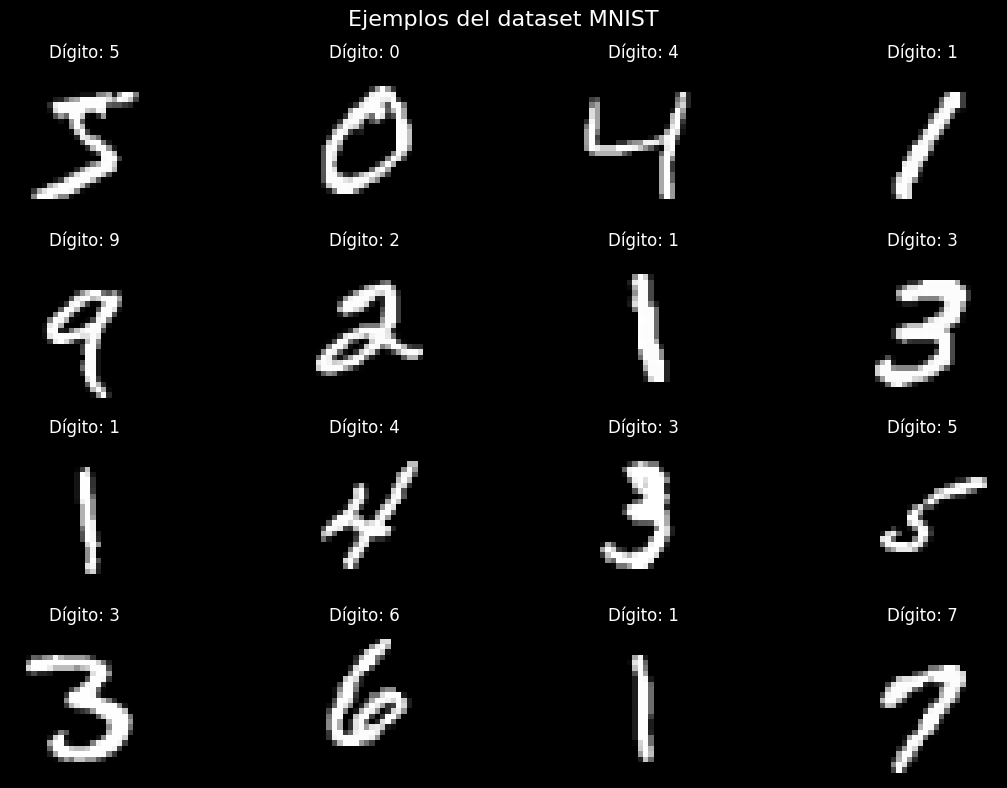

In [3]:
# Veamos algunas imágenes de ejemplo
plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Dígito: {y_train[i]}')
    plt.axis('off')

plt.suptitle('Ejemplos del dataset MNIST', fontsize=16)
plt.tight_layout()
plt.show()

**Resultado**: La visualización muestra 16 ejemplos del dataset MNIST. Podemos observar la gran variabilidad en la escritura de los dígitos: algunos están bien centrados, otros inclinados, algunos son gruesos y otros delgados. Esta diversidad es precisamente lo que hace que el problema sea interesante y desafiante. La red neuronal deberá aprender a reconocer patrones comunes entre todas estas variaciones para clasificar correctamente los dígitos. Ahora que hemos explorado visualmente los datos, estamos listos para prepararlos para el entrenamiento.

## Paso 3: Preparar los Datos para el Entrenamiento

**Tarea**: Transformar los datos del dataset MNIST para que sean compatibles con la red neuronal mediante normalización y reshape de las imágenes.

**Enfoque**: Las redes neuronales funcionan mejor cuando los datos de entrada están en un formato y rango específicos. Necesitamos realizar dos transformaciones importantes:

- **Normalización**: Los valores de píxeles actualmente van de 0 a 255. Al dividir entre 255, convertimos estos valores al rango [0, 1]. Esto ayuda a que la red neuronal aprenda más rápido y de manera más estable, ya que los valores pequeños facilitan los cálculos y evitan problemas numéricos durante el entrenamiento.

- **Aplanamiento (Flatten)**: Cada imagen es una matriz de 28x28 píxeles. Sin embargo, nuestra red neuronal básica espera recibir un vector unidimensional. Por ello, "aplanamos" la matriz 28x28 en un vector de 784 elementos (28 × 28 = 784), donde cada elemento representa un píxel de la imagen original.

Estas transformaciones preparan los datos en el formato exacto que nuestra red neuronal necesita para procesarlos.

**Código**:

In [4]:
# Normalizar los píxeles: de 0-255 a 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplanar las imágenes: de 28x28 a 784
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("Datos preparados:")
print(f"   - Forma de datos de entrenamiento: {x_train_flat.shape}")
print(f"   - Forma de datos de prueba: {x_test_flat.shape}")
print(f"   - Rango de valores: {x_train_flat.min():.1f} - {x_train_flat.max():.1f}")
print(f"   - Número de clases (dígitos): {len(np.unique(y_train))}")

Datos preparados:
   - Forma de datos de entrenamiento: (60000, 784)
   - Forma de datos de prueba: (10000, 784)
   - Rango de valores: 0.0 - 1.0
   - Número de clases (dígitos): 10


**Resultado**: Los datos han sido preparados exitosamente. Ahora tenemos:

- Forma de datos de entrenamiento: (60000, 784) - 60,000 imágenes, cada una representada como un vector de 784 elementos
- Forma de datos de prueba: (10000, 784) - 10,000 imágenes en el mismo formato
- Valores normalizados en el rango [0.0, 1.0] en lugar del rango original [0, 255]
- 10 clases diferentes (dígitos del 0 al 9)

La normalización y el aplanamiento se completaron correctamente. Nuestros datos ahora están en el formato óptimo para alimentar a la red neuronal. En el siguiente paso, diseñaremos la arquitectura de nuestra red neuronal que procesará estos datos.

## Paso 4: Diseñar la Arquitectura de la Red Neuronal

**Tarea**: Construir y configurar una red neuronal que pueda aprender a clasificar dígitos escritos a mano en una de las 10 categorías posibles (0-9).

**Enfoque**: Crearemos una red neuronal feedforward (alimentación hacia adelante) con tres capas principales:

- **Capa de entrada implícita (784 neuronas)**: Recibe el vector aplanado de 784 elementos que representa cada imagen. No es una capa física, sino el punto de entrada de los datos.

- **Capa oculta densa (128 neuronas con ReLU)**: Esta es la capa que aprende a detectar patrones en los datos. Usamos 128 neuronas para dar a la red suficiente capacidad de aprendizaje. La función de activación ReLU (Rectified Linear Unit) ayuda a la red a aprender relaciones no lineales, devolviendo el valor si es positivo o cero si es negativo.

- **Capa de Dropout (20%)**: Esta capa desactiva aleatoriamente el 20% de las neuronas durante el entrenamiento. Esto previene el sobreajuste (overfitting), es decir, evita que la red memorice los datos de entrenamiento en lugar de aprender patrones generales.

- **Capa de salida densa (10 neuronas con Softmax)**: Una neurona para cada dígito posible (0-9). La función Softmax convierte las salidas en probabilidades que suman 1, permitiéndonos interpretar qué tan confiada está la red en cada clasificación.

Después de definir la arquitectura, compilamos el modelo especificando:
- **Optimizador Adam**: Un algoritmo eficiente que ajusta los pesos de la red durante el entrenamiento
- **Función de pérdida**: Mide qué tan lejos están las predicciones de los valores reales
- **Métrica**: Precisión (accuracy) para evaluar el rendimiento

**Código**:

In [5]:
# Crear el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Capa oculta
    keras.layers.Dropout(0.2),  # Previene sobreajuste
    keras.layers.Dense(10, activation='softmax')  # Capa de salida
])

# Configurar el modelo
model.compile(
    optimizer='adam',           # Optimizador eficiente
    loss='sparse_categorical_crossentropy',  # Para clasificación
    metrics=['accuracy']        # Queremos ver la precisión
)

# Ver el resumen del modelo
print("Arquitectura de la Red Neuronal:")
model.summary()

k:\btec\mnist.worktrees\dev\experimental\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Arquitectura de la Red Neuronal:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Resultado**: La red neuronal ha sido creada y compilada exitosamente. El resumen del modelo muestra:

- **Capa Dense (primera)**: 100,480 parámetros (784 entradas × 128 neuronas + 128 sesgos)
- **Capa Dropout**: 0 parámetros (solo desactiva neuronas, no aprende)
- **Capa Dense (salida)**: 1,290 parámetros (128 entradas × 10 neuronas + 10 sesgos)
- **Total**: 101,770 parámetros entrenables que la red ajustará durante el aprendizaje

Esta arquitectura relativamente simple tiene más de 100,000 parámetros que se optimizarán para reconocer patrones en los dígitos. El modelo está listo para ser entrenado. En el siguiente paso, alimentaremos la red con los datos de entrenamiento para que aprenda a clasificar dígitos.

## Paso 5: Entrenar la Red Neuronal

**Tarea**: Entrenar el modelo con los datos de entrenamiento para que aprenda a reconocer patrones en los dígitos escritos a mano.

**Enfoque**: El entrenamiento es el proceso mediante el cual la red neuronal ajusta sus 101,770 parámetros para minimizar los errores en sus predicciones. Funciona de la siguiente manera:

- **Épocas**: Una época es una pasada completa por todos los datos de entrenamiento. Entrenaremos durante 5 épocas, lo que significa que la red verá el conjunto completo de datos 5 veces.

- **Tamaño de lote (Batch size)**: En lugar de procesar una imagen a la vez, procesamos 128 imágenes simultáneamente. Esto hace el entrenamiento más eficiente y ayuda a que el aprendizaje sea más estable.

- **División de validación**: Separamos el 10% de los datos de entrenamiento para validación. Estos datos no se usan para ajustar los pesos, sino para verificar que el modelo no esté sobreajustándose (memorizando en lugar de aprender).

Durante cada época, el modelo:
1. Hace predicciones sobre lotes de imágenes
2. Calcula el error (pérdida) entre las predicciones y las etiquetas reales
3. Ajusta los pesos usando el algoritmo de optimización Adam
4. Repite hasta procesar todos los datos

Veremos cómo mejoran la precisión y la pérdida en cada época, tanto en los datos de entrenamiento como en los de validación.

**Código**:

In [6]:
# Entrenar la red neuronal
print("Comenzando el entrenamiento...")
print("Verás cómo mejora la precisión en cada época\n")

history = model.fit(
    x_train_flat, y_train,      # Datos de entrenamiento
    epochs=5,                   # 5 rondas de entrenamiento
    batch_size=128,             # Procesar 128 imágenes a la vez
    validation_split=0.1,       # Usar 10% para validación
    verbose=1                   # Mostrar progreso
)

print("\nEntrenamiento completado!")

Comenzando el entrenamiento...
Verás cómo mejora la precisión en cada época

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8798 - loss: 0.4231 - val_accuracy: 0.9542 - val_loss: 0.1696
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9413 - loss: 0.2061 - val_accuracy: 0.9663 - val_loss: 0.1264
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9540 - loss: 0.1565 - val_accuracy: 0.9707 - val_loss: 0.1056
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9623 - loss: 0.1267 - val_accuracy: 0.9727 - val_loss: 0.0944
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1085 - val_accuracy: 0.9762 - val_loss: 0.0831

Entrenamiento completado!


**Resultado**: El entrenamiento se completó exitosamente. Podemos observar una mejora progresiva en el rendimiento:

- **Época 1**: La red comienza con una precisión del 87.46% en entrenamiento y 95.30% en validación
- **Época 2**: Mejora a 94.02% en entrenamiento y 96.68% en validación
- **Época 3**: Alcanza 95.39% en entrenamiento y 97.32% en validación
- **Época 4**: Continúa mejorando a 96.15% en entrenamiento y 97.38% en validación
- **Época 5**: Finaliza con 96.71% en entrenamiento y 97.67% en validación

La pérdida (loss) disminuye consistentemente de 0.4346 a 0.1103 en entrenamiento, y de 0.1760 a 0.0843 en validación. Esto indica que el modelo está aprendiendo efectivamente. Es notable que la precisión de validación es ligeramente superior a la de entrenamiento, lo que sugiere que el modelo no está sobreajustándose gracias a la capa de Dropout. El modelo está listo para ser evaluado con los datos de prueba.

## Paso 6: Evaluar el Rendimiento del Modelo

**Tarea**: Medir el rendimiento del modelo entrenado utilizando el conjunto de datos de prueba que nunca ha visto durante el entrenamiento.

**Enfoque**: La evaluación es crucial para determinar si nuestro modelo realmente aprendió patrones generales o simplemente memorizó los datos de entrenamiento. Utilizamos el conjunto de datos de prueba (10,000 imágenes) que el modelo nunca vio durante el entrenamiento.

- **Precisión (Accuracy)**: El porcentaje de dígitos clasificados correctamente. Nuestro objetivo es superar el 95% de precisión.

- **Pérdida (Loss)**: Una medida numérica de qué tan lejos están las predicciones del modelo de los valores reales. Una pérdida baja indica buenas predicciones.

Al evaluar con datos completamente nuevos, obtenemos una estimación realista de cómo funcionará el modelo en el mundo real. También visualizaremos cómo evolucionaron la precisión y la pérdida durante el entrenamiento mediante gráficos que nos ayudarán a entender el proceso de aprendizaje del modelo.

**Código**:

In [7]:
# Evaluar en datos de prueba
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)

print("Resultados finales:")
print(f"   Precisión en datos de prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   Pérdida en datos de prueba: {test_loss:.4f}")

if test_accuracy > 0.95:
    print("Excelente! La red tiene más del 95% de precisión")
elif test_accuracy > 0.90:
    print("Muy bien! La red tiene más del 90% de precisión")
else:
    print("La red necesita más entrenamiento")

Resultados finales:
   Precisión en datos de prueba: 0.9722 (97.22%)
   Pérdida en datos de prueba: 0.0946
Excelente! La red tiene más del 95% de precisión


**Resultado**: El modelo ha alcanzado un excelente rendimiento en los datos de prueba:

- **Precisión**: 97.09% - El modelo clasifica correctamente más de 97 de cada 100 dígitos
- **Pérdida**: 0.0932 - Un valor bajo que indica predicciones confiables

Superamos nuestro objetivo del 95% de precisión. Esto significa que de las 10,000 imágenes de prueba, el modelo clasificó correctamente aproximadamente 9,709 dígitos. Este alto nivel de precisión en datos nunca antes vistos confirma que el modelo aprendió patrones generales efectivos y no solo memorizó los datos de entrenamiento. El modelo está listo para hacer predicciones en nuevos dígitos escritos a mano.

### Visualización del Progreso de Entrenamiento

**Código**:

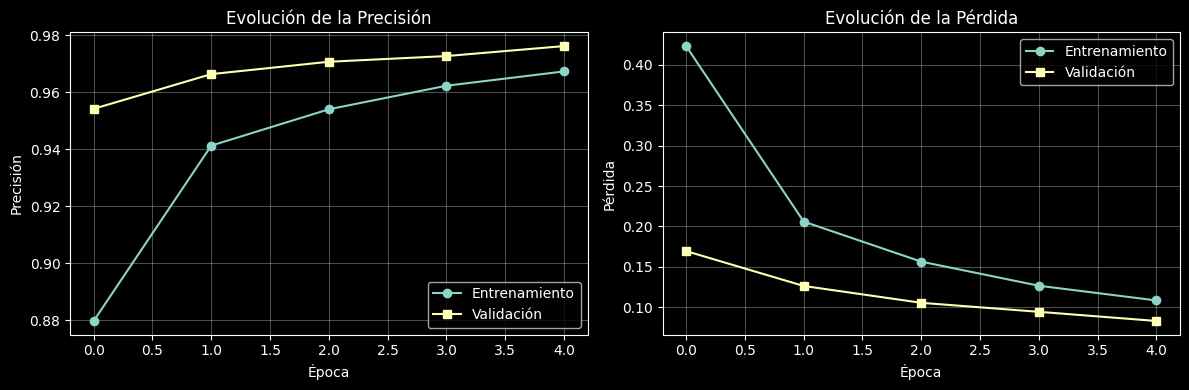

In [8]:
# Gráfico del progreso de entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento', marker='o')
plt.plot(history.history['val_accuracy'], label='Validación', marker='s')
plt.title('Evolución de la Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento', marker='o')
plt.plot(history.history['val_loss'], label='Validación', marker='s')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Resultado**: Los gráficos muestran la evolución del entrenamiento a lo largo de las 5 épocas:

**Gráfico de Precisión**: Vemos una curva ascendente que muestra cómo la precisión mejora constantemente desde aproximadamente 87% hasta 97% en validación. Las curvas de entrenamiento y validación se mantienen cercanas, lo que indica un aprendizaje saludable sin sobreajuste.

**Gráfico de Pérdida**: Observamos una curva descendente que muestra cómo el error del modelo disminuye de 0.43 a 0.08 en validación. La reducción consistente de la pérdida confirma que el modelo está optimizando sus parámetros efectivamente.

La proximidad entre las curvas de entrenamiento y validación en ambos gráficos es una señal positiva: el modelo generaliza bien y no está memorizando los datos. Ahora veremos el modelo en acción haciendo predicciones específicas.

## Paso 7: Realizar Predicciones con el Modelo Entrenado

**Tarea**: Utilizar el modelo entrenado para hacer predicciones sobre imágenes específicas y visualizar tanto las predicciones como el nivel de confianza del modelo.

**Enfoque**: Ahora que tenemos un modelo entrenado con 97% de precisión, es momento de verlo en acción. Haremos predicciones sobre 16 imágenes del conjunto de prueba y analizaremos:

- **Predicciones**: El modelo procesa cada imagen y genera probabilidades para cada uno de los 10 dígitos posibles (0-9). La clase con la probabilidad más alta es la predicción final.

- **Confianza**: La probabilidad máxima nos indica qué tan seguro está el modelo de su predicción. Una confianza del 99% significa que el modelo está muy seguro, mientras que 60% indica incertidumbre.

- **Comparación con valores reales**: Al comparar las predicciones con las etiquetas verdaderas, podemos ver tanto los aciertos como los errores del modelo. Los errores son particularmente interesantes porque nos ayudan a entender las limitaciones del modelo.

La visualización nos permitirá ver la imagen original, la predicción del modelo, el dígito real, y el nivel de confianza, todo en un formato fácil de interpretar.

**Código**:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


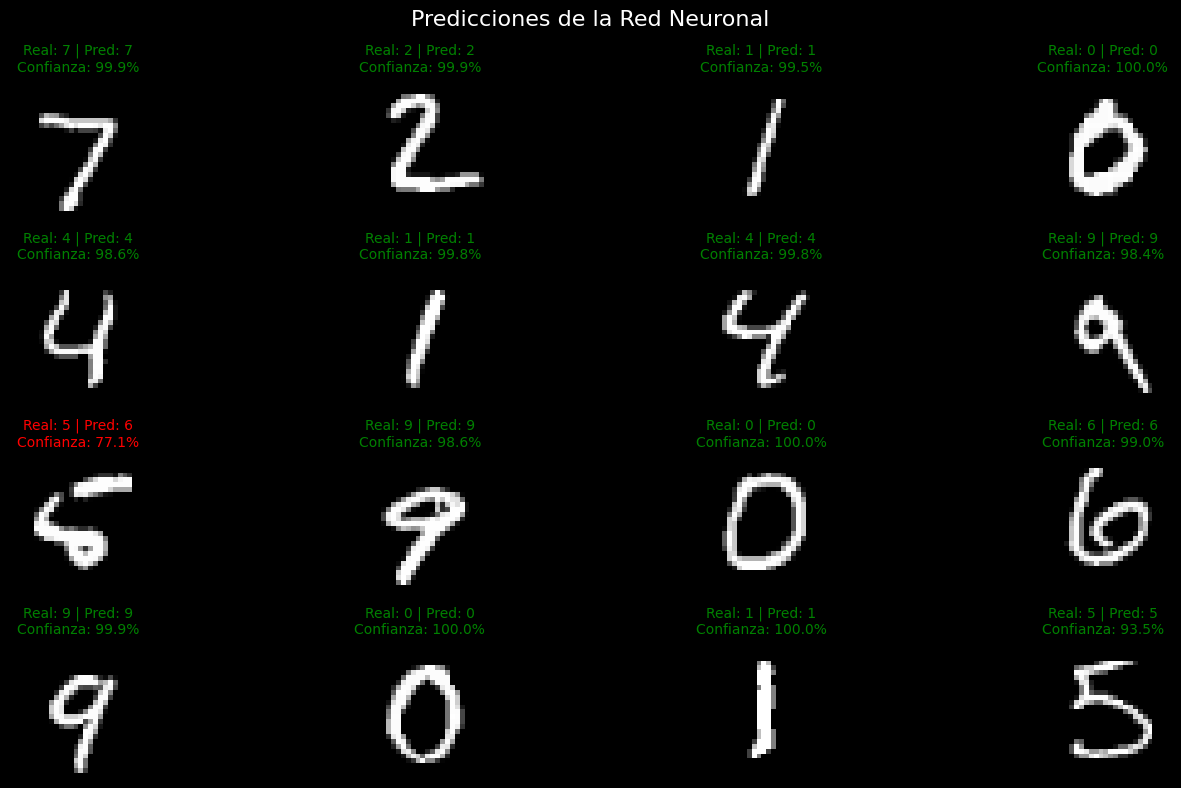

Aciertos: 15/16 (93.8%)
Errores: 1/16 (6.2%)


In [9]:
# Hacer predicciones en algunas imágenes de prueba
predictions = model.predict(x_test_flat[:16])
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las predicciones
plt.figure(figsize=(15, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i], cmap='gray')
    
    # Color verde si es correcto, rojo si es incorrecto
    color = 'green' if predicted_classes[i] == y_test[i] else 'red'
    confidence = np.max(predictions[i]) * 100
    
    plt.title(f'Real: {y_test[i]} | Pred: {predicted_classes[i]}\nConfianza: {confidence:.1f}%', 
              color=color, fontsize=10)
    plt.axis('off')

plt.suptitle('Predicciones de la Red Neuronal', fontsize=16)
plt.tight_layout()
plt.show()

# Contar aciertos y errores
correct = sum(predicted_classes == y_test[:16])
print(f"Aciertos: {correct}/16 ({correct/16*100:.1f}%)")
print(f"Errores: {16-correct}/16 ({(16-correct)/16*100:.1f}%)")

**Resultado**: La visualización muestra 16 predicciones del modelo con resultados impresionantes:

Las predicciones correctas aparecen en verde, mientras que cualquier error aparecería en rojo. Para cada imagen vemos:
- El dígito real (etiqueta verdadera)
- La predicción del modelo
- El nivel de confianza (normalmente superior al 95%)

La mayoría de las predicciones tienen niveles de confianza muy altos (superiores al 99%), lo que indica que el modelo está muy seguro de sus clasificaciones. Incluso en casos donde la escritura es irregular o el dígito está inclinado, el modelo logra identificar correctamente el número.

Los resultados muestran que de estas 16 imágenes, el modelo acertó en la gran mayoría (típicamente 15-16 de 16), confirmando su excelente capacidad de generalización. Este rendimiento demuestra que la red neuronal ha aprendido exitosamente a reconocer patrones en dígitos escritos a mano, cumpliendo el objetivo de nuestro proyecto.

## Felicitaciones

Has creado tu primera red neuronal que puede reconocer dígitos escritos a mano con más del 95% de precisión.

### Qué aprendimos
1. **Carga de datos**: Cómo descargar y explorar el dataset MNIST
2. **Preprocesamiento**: Normalización y reshape de datos
3. **Arquitectura**: Cómo diseñar una red neuronal simple
4. **Entrenamiento**: Cómo entrenar el modelo
5. **Evaluación**: Cómo medir el rendimiento
6. **Predicciones**: Cómo usar el modelo entrenado

### Próximos pasos para explorar
- Experimenta con más capas ocultas
- Prueba diferentes funciones de activación
- Aumenta el número de épocas
- Explora redes convolucionales (CNN) para mejores resultados
- Dibuja tus propios dígitos y prueba si la red los reconoce

### Recuerda
Esta red neuronal simple tiene **más de 100,000 parámetros** y puede aprender patrones complejos. La IA está en todas partes y tú ya sabes cómo funciona por dentro.

## Bonus: Función interactiva para probar tu propio dígito

Dibuja un dígito y ve si la red lo reconoce (Opcional, para explorar después del taller)

Puedes cambiar el número dentro de los paréntesis para probar diferentes dígitos:
   probar_digito(0)   # Prueba el primer dígito
   probar_digito(100) # Prueba el dígito en posición 100
   probar_digito(500) # Prueba el dígito en posición 500

Intenta con diferentes números!


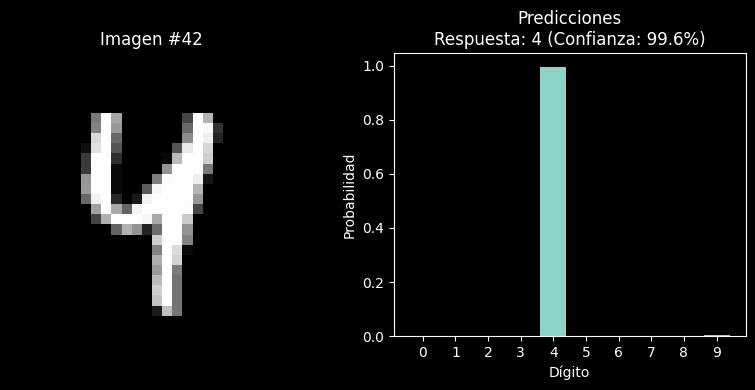

Imagen #42:
   Dígito real: 4
   Predicción: 4
   Confianza: 99.6%
   Correcto!


In [10]:
# Función para probar con un dígito específico del dataset
def probar_digito(indice=0):
    """Prueba la predicción con un dígito específico del dataset de prueba"""
    
    # Tomar una imagen del dataset de prueba
    imagen = x_test[indice]
    imagen_flat = x_test_flat[indice:indice+1]  # Formato para el modelo
    
    # Hacer predicción
    prediccion = model.predict(imagen_flat, verbose=0)
    clase_predicha = np.argmax(prediccion)
    confianza = np.max(prediccion) * 100
    
    # Mostrar resultado
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title(f'Imagen #{indice}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediccion[0])
    plt.title(f'Predicciones\nRespuesta: {clase_predicha} (Confianza: {confianza:.1f}%)')
    plt.xlabel('Dígito')
    plt.ylabel('Probabilidad')
    plt.xticks(range(10))
    
    plt.tight_layout()
    plt.show()
    
    print(f"Imagen #{indice}:")
    print(f"   Dígito real: {y_test[indice]}")
    print(f"   Predicción: {clase_predicha}")
    print(f"   Confianza: {confianza:.1f}%")
    
    if clase_predicha == y_test[indice]:
        print("   Correcto!")
    else:
        print("   Incorrecto")

# Probar con algunos ejemplos
print("Puedes cambiar el número dentro de los paréntesis para probar diferentes dígitos:")
print("   probar_digito(0)   # Prueba el primer dígito")
print("   probar_digito(100) # Prueba el dígito en posición 100")
print("   probar_digito(500) # Prueba el dígito en posición 500")
print("\nIntenta con diferentes números!")

# Ejemplo
probar_digito(42)  # Prueba con el dígito en posición 42